In [133]:
import os

BASE_DIR = os.path.dirname(os.getcwd())

## 1. Load dataset

In [134]:
dataset_path = os.path.join(BASE_DIR, 'data', 'data.csv')

# 2. Import Library

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates

from sklearn.preprocessing import StandardScaler

# 3. Tổng Quan bộ dữ liệu

In [136]:
df = pd.read_csv(dataset_path, encoding='utf-8', parse_dates=['Time'])
display(df.head())
display(df.tail())

,Time,Crypto,Buying_Price_of_Nexus,Selling_Price_of_Nexus,Price_of_Stock
0,2024-05-20,4174.950000,1270.30,1272.56,113.456685
1,2024-05-21,4340.316717,1272.75,1277.70,114.961755
2,2024-05-22,4331.770000,1285.15,1287.88,110.453726
3,2024-05-23,4360.513317,1295.80,1297.22,110.921833
4,2024-05-24,4354.308333,1292.90,1297.53,109.518120


,Time,Crypto,Buying_Price_of_Nexus,Selling_Price_of_Nexus,Price_of_Stock
385,2025-06-09,6273.1375,1331.25,1336.57,130.488913
386,2025-06-10,6326.0400,1329.05,1331.36,128.506408
387,2025-06-11,6499.0625,1331.05,1333.50,129.788751
388,2025-06-12,6518.6550,1325.05,1328.34,134.834571
389,2025-06-13,6522.3900,1322.85,1326.74,138.581283


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Time                    390 non-null    datetime64[ns]
 1   Crypto                  390 non-null    float64       
 2   Buying_Price_of_Nexus   277 non-null    float64       
 3   Selling_Price_of_Nexus  277 non-null    float64       
 4   Price_of_Stock          280 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 15.4 KB


In [138]:
columns_to_describe = ['Crypto', 'Buying_Price_of_Nexus', 'Selling_Price_of_Nexus', 'Price_of_Stock']

# Lấy bảng thống kê
descriptive_table = df[columns_to_describe].describe()
display(descriptive_table)

,Crypto,Buying_Price_of_Nexus,Selling_Price_of_Nexus,Price_of_Stock
count,390.000000,277.000000,277.000000,280.000000
mean,8255.440081,1277.047834,1280.927762,126.819727
std,3173.439818,47.022946,47.105221,14.950152
min,3216.430000,1178.400000,1183.770000,103.811791
25%,6375.406458,1233.850000,1237.310000,112.726106
50%,7517.710000,1284.350000,1288.360000,126.608232
75%,9319.123750,1316.550000,1319.510000,138.638968
max,19498.683330,1354.950000,1358.490000,166.549415


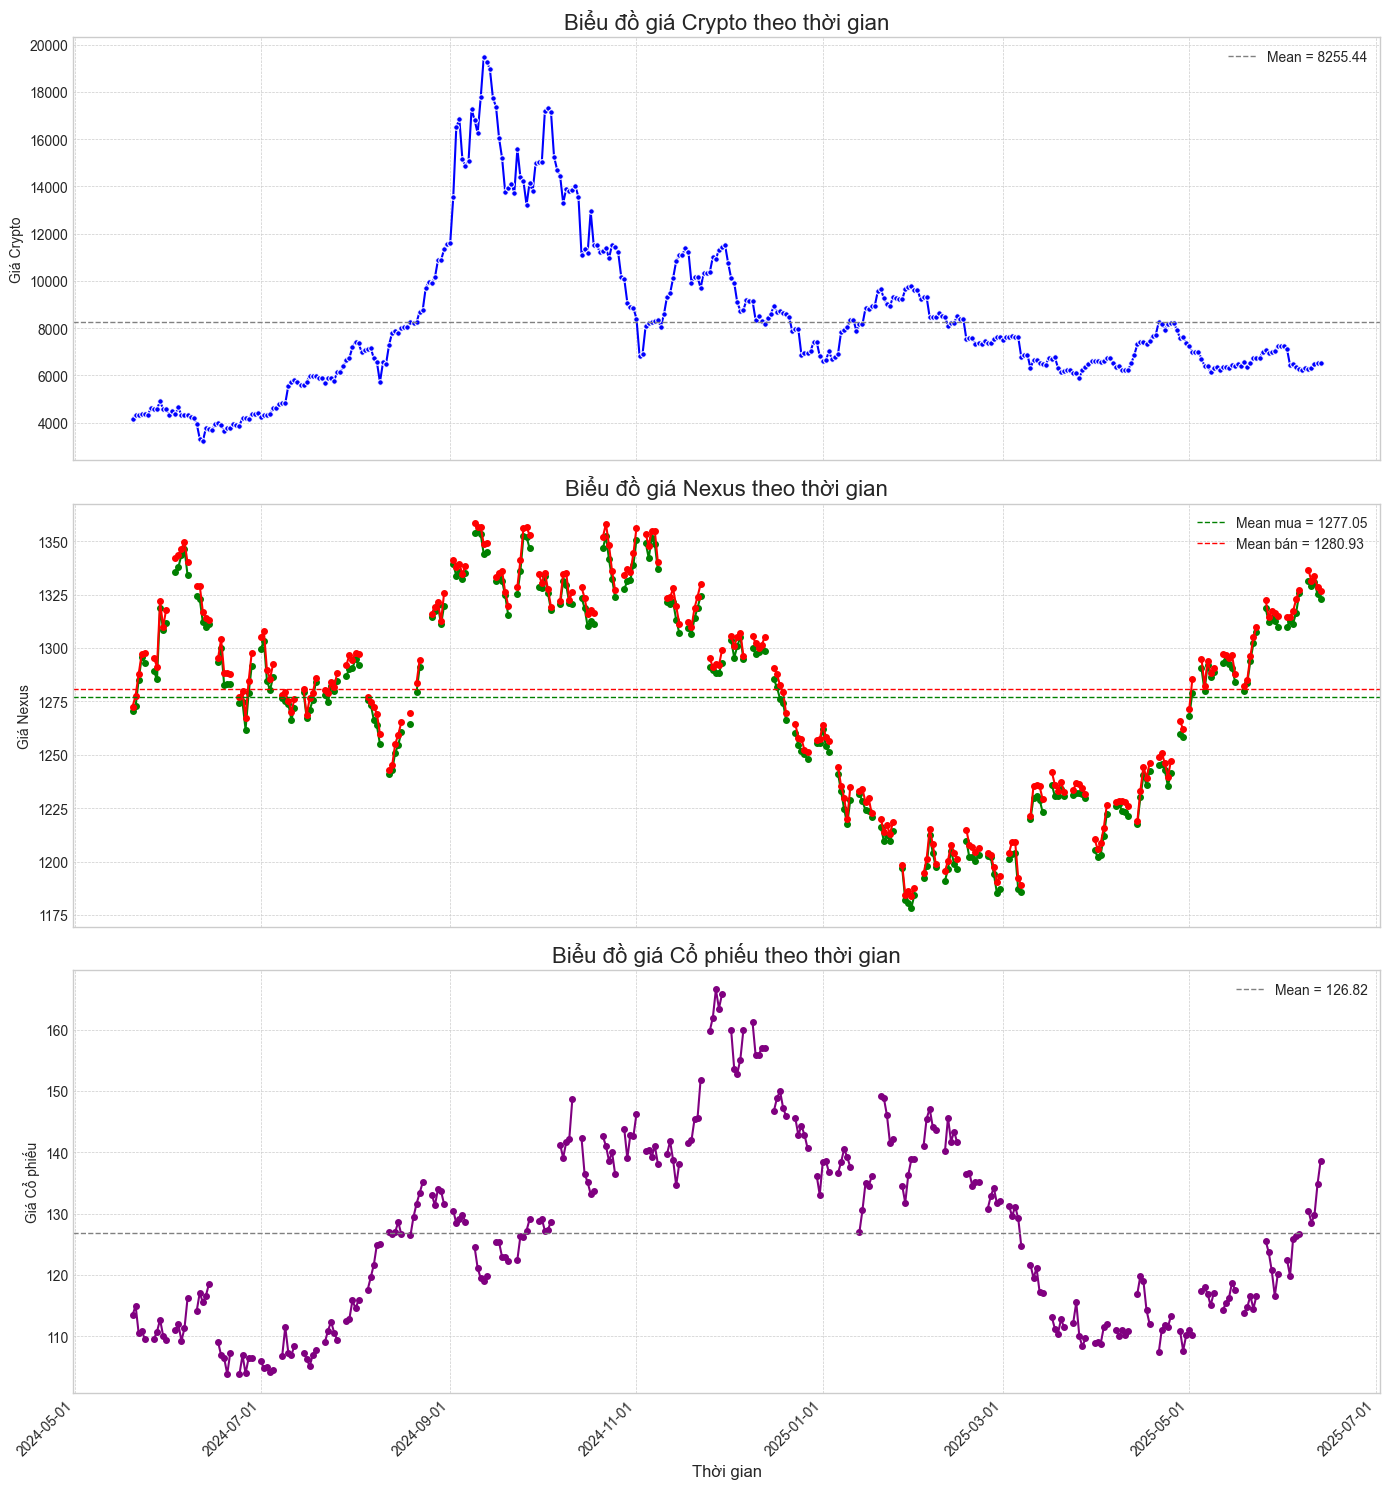

In [139]:
def plot_with_gaps(ax, x, y, **kwargs):
    group_ids = y.isnull().diff().ne(0).cumsum().rename('group_id')
    temp_df = pd.concat([x, y, group_ids], axis=1)
    temp_df = temp_df.dropna(subset=[y.name])
    for _, group_data in temp_df.groupby('group_id'):
        ax.plot(group_data[x.name], group_data[y.name], **kwargs)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 15), sharex=True)
sns.set_style("whitegrid")

# Biểu đồ 1: Crypto
sns.lineplot(ax=axes[0], data=df, x='Time', y='Crypto', color='blue', marker='o', markersize=4)
mean_crypto = df['Crypto'].mean()
axes[0].axhline(mean_crypto, color='gray', linestyle='--', linewidth=1, label=f'Mean = {mean_crypto:.2f}')
axes[0].set_title('Biểu đồ giá Crypto theo thời gian', fontsize=16)
axes[0].set_ylabel('Giá Crypto')
axes[0].legend()
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Biểu đồ 2: Nexus
mean_buy = df['Buying_Price_of_Nexus'].mean()
mean_sell = df['Selling_Price_of_Nexus'].mean()
plot_with_gaps(axes[1], df['Time'], df['Buying_Price_of_Nexus'], color='green', marker='o', markersize=4, linestyle='-')
plot_with_gaps(axes[1], df['Time'], df['Selling_Price_of_Nexus'], color='red', marker='o', markersize=4, linestyle='-')
axes[1].axhline(mean_buy, color='green', linestyle='--', linewidth=1, label=f'Mean mua = {mean_buy:.2f}')
axes[1].axhline(mean_sell, color='red', linestyle='--', linewidth=1, label=f'Mean bán = {mean_sell:.2f}')
axes[1].set_title('Biểu đồ giá Nexus theo thời gian', fontsize=16)
axes[1].set_ylabel('Giá Nexus')
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Biểu đồ 3: Cổ phiếu
mean_stock = df['Price_of_Stock'].mean()
plot_with_gaps(axes[2], df['Time'], df['Price_of_Stock'], color='purple', marker='o', markersize=4, linestyle='-')
axes[2].axhline(mean_stock, color='gray', linestyle='--', linewidth=1, label=f'Mean = {mean_stock:.2f}')
axes[2].set_title('Biểu đồ giá Cổ phiếu theo thời gian', fontsize=16)
axes[2].set_ylabel('Giá Cổ phiếu')
axes[2].set_xlabel('Thời gian', fontsize=12)
axes[2].legend()
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Định dạng trục thời gian
date_format = mdates.DateFormatter('%Y-%m-%d')
axes[2].xaxis.set_major_formatter(date_format)
plt.setp(axes[2].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.show()


## Kiểm Tra missing values

In [140]:
df.isnull().sum()

Time                        0
Crypto                      0
Buying_Price_of_Nexus     113
Selling_Price_of_Nexus    113
Price_of_Stock            110
dtype: int64

In [141]:
# 1. Lọc ra những dòng có ít nhất một giá trị missing
price_cols = ['Buying_Price_of_Nexus', 'Selling_Price_of_Nexus', 'Price_of_Stock']
df_missing = df[df[price_cols].isnull().any(axis=1)].copy()

# 2. Xử lý và đếm dữ liệu thiếu của các ngày trong tuần
weekdays_with_missing = df_missing[df_missing['Time'].dt.dayofweek < 5]

# 3. Xử lý và đếm dữ liệu thiếu của các ngày cuối tuần
weekends_with_missing = df_missing[df_missing['Time'].dt.dayofweek >= 5]
saturday_missing_count = len(weekends_with_missing[weekends_with_missing['Time'].dt.dayofweek == 5])
sunday_missing_count = len(weekends_with_missing[weekends_with_missing['Time'].dt.dayofweek == 6])
total_weekends_missing = saturday_missing_count + sunday_missing_count

# 4. Đếm TỔNG SỐ ngày cuối tuần có trong toàn bộ dữ liệu
total_weekends_in_dataset = len(df[df['Time'].dt.dayofweek >= 5])

# In danh sách các ngày trong tuần bị thiếu
if not weekdays_with_missing.empty:
    print("\nCác ngày TRONG TUẦN (Thứ 2 - Thứ 6) bị thiếu dữ liệu:")
    for date in weekdays_with_missing['Time']:
        print(f"   - {date.strftime('%Y-%m-%d')}")
else:
    print("\nKhông có ngày nào trong tuần bị thiếu dữ liệu.\n")

# In ra tỉ lệ
print(f"\nTỉ lệ ngày cuối tuần bị thiếu: {total_weekends_missing} / {total_weekends_in_dataset} ")


Các ngày TRONG TUẦN (Thứ 2 - Thứ 6) bị thiếu dữ liệu:
   - 2024-08-20
   - 2024-08-23
   - 2025-04-30

Tỉ lệ ngày cuối tuần bị thiếu: 110 / 110 


>Missing value chủ yếu rơi vào các ngày T7, CN cho 2 loại sản phẩm là Nexus và Stock. Việc lấy giá trị ngày T6 để điền là hoàn toàn hợp lý. Các ngày khác missing khá ít, có thể cân nhắc việc điền đơn giản như location mean, linear,...

## Xử lý missing values

> Điền missing T7 và CN bằng giá trị T6

In [142]:
# 1. Xác định các vị trí thiếu dữ liệu ban đầu trên toàn bộ DataFrame
original_missing_mask = df[price_cols].isnull()

# 2. Sử dụng ffill() để điền tất cả các giá trị thiếu.
# Thao tác này sẽ tự động điền giá trị của ngày Thứ 6 vào Thứ 7, CN bị thiếu.
df[price_cols] = df[price_cols].ffill()

# 3. Khôi phục lại giá trị NaN cho những ngày TRONG TUẦN (T2-T6) bị thiếu ban đầu.
# Chúng ta không muốn điền giá trị cho các ngày này.
is_weekday = df['Time'].dt.dayofweek < 5

# Kết hợp 2 điều kiện: (bị thiếu ban đầu) VÀ (là ngày trong tuần)
# Dùng .values.reshape(-1, 1) để broadcast điều kiện is_weekday cho các cột trong price_cols
restore_nan_mask = original_missing_mask & is_weekday.values.reshape(-1, 1)

# Đặt lại giá trị NaN tại các vị trí cần khôi phục
df[restore_nan_mask] = np.nan

In [143]:
df.isnull().sum()

Time                      0
Crypto                    0
Buying_Price_of_Nexus     3
Selling_Price_of_Nexus    3
Price_of_Stock            0
dtype: int64

> Điền Trung bình cộng giá trị trước và sau của ngày missing ngày trong tuần

In [144]:
# Điền các giá trị NaN còn lại (chỉ có ở ngày trong tuần)
# bằng phương pháp nội suy tuyến tính (trung bình của điểm trước và sau)
df[price_cols] = df[price_cols].interpolate(method='linear')

In [145]:
df.isnull().sum()

Time                      0
Crypto                    0
Buying_Price_of_Nexus     0
Selling_Price_of_Nexus    0
Price_of_Stock            0
dtype: int64

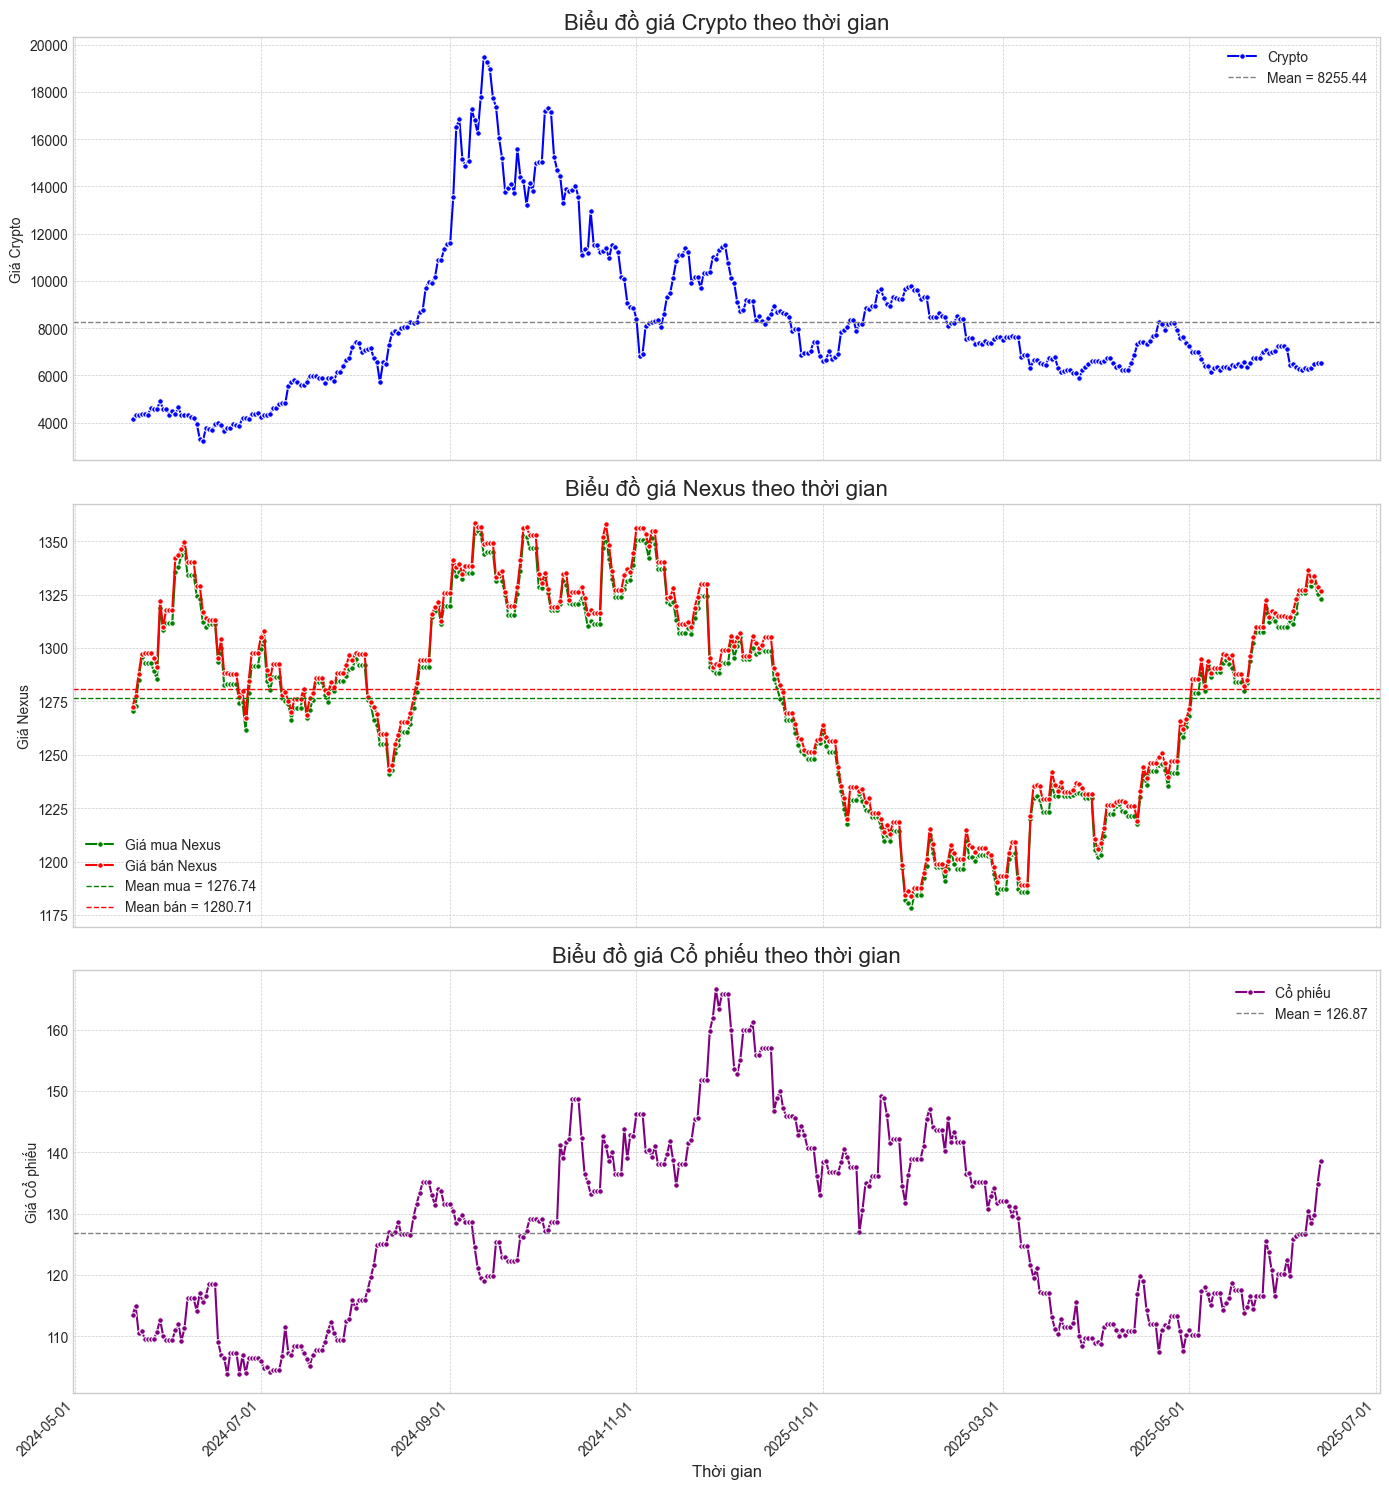

In [146]:
# Tính mean của các cột cần vẽ
mean_crypto = df['Crypto'].mean()
mean_nexus_buy = df['Buying_Price_of_Nexus'].mean()
mean_nexus_sell = df['Selling_Price_of_Nexus'].mean()
mean_stock = df['Price_of_Stock'].mean()

# Tạo 3 biểu đồ con (subplots) xếp dọc, chia sẻ trục X (Thời gian)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 15), sharex=True)
sns.set_style("whitegrid")

# --- Biểu đồ 1: Giá Crypto ---
sns.lineplot(ax=axes[0], data=df, x='Time', y='Crypto', color='blue', marker='o', markersize=4, label='Crypto')
axes[0].axhline(mean_crypto, color='gray', linestyle='--', linewidth=1, label=f'Mean = {mean_crypto:.2f}')
axes[0].set_title('Biểu đồ giá Crypto theo thời gian', fontsize=16)
axes[0].set_ylabel('Giá Crypto')
axes[0].legend()
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Biểu đồ 2: Giá Mua và Bán của Nexus ---
sns.lineplot(ax=axes[1], data=df, x='Time', y='Buying_Price_of_Nexus', color='green', label='Giá mua Nexus', marker='o', markersize=4)
sns.lineplot(ax=axes[1], data=df, x='Time', y='Selling_Price_of_Nexus', color='red', label='Giá bán Nexus', marker='o', markersize=4)
axes[1].axhline(mean_nexus_buy, color='green', linestyle='--', linewidth=1, label=f'Mean mua = {mean_nexus_buy:.2f}')
axes[1].axhline(mean_nexus_sell, color='red', linestyle='--', linewidth=1, label=f'Mean bán = {mean_nexus_sell:.2f}')
axes[1].set_title('Biểu đồ giá Nexus theo thời gian', fontsize=16)
axes[1].set_ylabel('Giá Nexus')
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Biểu đồ 3: Giá Cổ phiếu ---
sns.lineplot(ax=axes[2], data=df, x='Time', y='Price_of_Stock', color='purple', marker='o', markersize=4, label='Cổ phiếu')
axes[2].axhline(mean_stock, color='gray', linestyle='--', linewidth=1, label=f'Mean = {mean_stock:.2f}')
axes[2].set_title('Biểu đồ giá Cổ phiếu theo thời gian', fontsize=16)
axes[2].set_ylabel('Giá Cổ phiếu')
axes[2].set_xlabel('Thời gian', fontsize=12)
axes[2].legend()
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# --- PHẦN ĐỊNH DẠNG TRỤC THỜI GIAN ---
date_format = mdates.DateFormatter('%Y-%m-%d')
axes[2].xaxis.set_major_formatter(date_format)
plt.setp(axes[2].get_xticklabels(), rotation=45, ha='right')

# Tự động điều chỉnh layout cho đẹp
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


# Nhận xét tổng quan

### Xu hướng chung
- Ta thấy xu hướng tăng giảm của cả 3 có nét tương tự tăng mạnh vào quý 4 năm 2024. 
- Kim loại Nexus có xu hướng khởi điểm từ Mean ở đầu năm, Crypto và Stock đều khởi điểm tại khu vực thấp hơn mean.
- Cryto có mức giá cuối cùng thấp hơn so với mean, trong khi cả Stock và Nexus đều cho thấy sự tăng vào cuối chu kì. 
### Xu hướng riêng
- Crypto có biên độ giao động tăng giảm mạnh mẽ (tăng gấp 4 lần nếu so với khởi điểm và lúc đạt đỉnh).
- Cổ phiếu có biên độ giao động ổn định hơn
- Kim loại Nexus có biên độ giao động khá nhỏ khi so với 2 loại hình trên.

**Phần biến động sẽ được phân tích định lượng kỹ hơn bên ở phần Log return**



# 4. Các metrics liên quan

## Các đại lượng thống kê

In [147]:
# Chọn các cột cần thống kê
columns_to_describe = ['Crypto', 'Buying_Price_of_Nexus', 'Selling_Price_of_Nexus', 'Price_of_Stock']

# Lấy bảng thống kê
descriptive_table = df[columns_to_describe].describe()
display(descriptive_table)

,Crypto,Buying_Price_of_Nexus,Selling_Price_of_Nexus,Price_of_Stock
count,390.000000,390.000000,390.000000,390.000000
mean,8255.440081,1276.740256,1280.705821,126.874443
std,3173.439818,46.675439,46.807279,15.026102
min,3216.430000,1178.400000,1183.770000,103.811791
25%,6375.406458,1234.225000,1237.750000,112.722150
50%,7517.710000,1284.550000,1288.380000,126.598415
75%,9319.123750,1314.425000,1318.985000,138.433274
max,19498.683330,1354.950000,1358.490000,166.549415


## Logarithmic Return

Trong tài chính, người ta thường tránh dùng tỷ suất sinh lợi đơn giản `(Giá_mới - Giá_cũ) / Giá_cũ` vì hai lý do chính:

1.  **Không cộng được theo thời gian**: Lợi nhuận của 2 ngày không bằng tổng lợi nhuận của từng ngày.
2.  **Không đối xứng**: Lỗ 50% (giá từ 100 xuống 50) cần phải lãi tới 100% (từ 50 lên lại 100) để hòa vốn.

**Tỷ suất sinh lợi log (Log Return)** giải quyết các vấn đề này. Nó được tính bằng công thức:

$$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})$$

Trong đó $P\_t$ là giá tại thời điểm $t$.

**Ưu điểm chính:**

  * **Cộng được theo thời gian (Time Additive)**: Lợi nhuận log của cả một tuần bằng tổng lợi nhuận log của từng ngày trong tuần đó. Điều này cực kỳ hữu ích cho việc mô hình hóa.
  * **Tính đối xứng**: Mức độ của một khoản lãi và một khoản lỗ trở nên dễ so sánh hơn.
  * **Giả định phân phối chuẩn**: Nhiều mô hình tài chính giả định rằng tỷ suất sinh lợi log tuân theo phân phối chuẩn, giúp việc phân tích thống kê trở nên đơn giản hơn nhiều.



## Độ lệch chuẩn của Tỷ suất sinh lợi Log (Historical Volatility)


Đây chính là **thước đo tiêu chuẩn của ngành tài chính để đo lường rủi ro và sự biến động (volatility)** của một tài sản trong quá khứ.

  * Nó được tính bằng cách lấy **độ lệch chuẩn** (`standard deviation`) của chuỗi tỷ suất sinh lợi log hàng ngày.
  * **Ý nghĩa**: Một giá trị cao cho thấy giá của tài sản biến động rất mạnh và khó lường, đồng nghĩa với rủi ro cao. Ngược lại, giá trị thấp cho thấy tài sản có giá tương đối ổn định.

Thông thường, người ta sẽ quy đổi sự biến động hàng ngày này ra **hàng năm (annualized volatility)** để dễ so sánh giữa các tài sản. Quy tắc chung là:

$$\text{Volatility}_{\text{năm}} = \text{Volatility}_{\text{ngày}} \times \sqrt{252}$$

Trong đó **252** là số ngày giao dịch trung bình trong một năm với loại tài sản tương ứng

---

Nếu kết quả in ra là: `Volatility = 58.45%`

Điều này có nghĩa là, dựa trên dữ liệu quá khứ, độ biến động hàng năm của tài sản là 58.45%. Nói một cách đơn giản, có khoảng 68% khả năng (trong một độ lệch chuẩn) là tỷ suất sinh lợi năm sẽ dao động trong khoảng +/- 58.45% quanh mức tỷ suất sinh lợi trung bình năm của nó. Đây là một con số cho thấy mức độ rủi ro rất cao.

In [148]:
# Các cột giá gốc cần tính toán
price_cols = ['Crypto', 'Buying_Price_of_Nexus', 'Price_of_Stock']

# 1. ĐỊNH NGHĨA HỆ SỐ QUY ĐỔI NĂM CHO TỪNG LOẠI TÀI SẢN
# Crypto dùng 365, các tài sản truyền thống dùng 252
annualization_factors = {
    'Crypto': 365, # Crypto giao dịch 365/365, cả T7 và CN
    'Buying_Price_of_Nexus': 252, # Giả định Nexus giống như cổ phiếu
    'Price_of_Stock': 252
}

# Dictionary để lưu kết quả
volatility_results = {}

print("--- Độ biến động hàng năm (Annualized Volatility) ---")
print(f"Sử dụng hệ số: Crypto={annualization_factors['Crypto']}, Cổ phiếu/Nexus={annualization_factors['Price_of_Stock']}\n")


for col in price_cols:
    # Tính Tỷ suất sinh lợi Log
    log_returns = np.log(df[col] / df[col].shift(1))
    
    # Tính độ lệch chuẩn hàng ngày
    daily_volatility = log_returns.std()
    
    # Lấy hệ số quy đổi tương ứng
    factor = annualization_factors[col]
    
    # Quy đổi ra biến động hàng năm với hệ số chính xác
    annualized_volatility = daily_volatility * np.sqrt(factor)
    
    # Lưu và in kết quả
    volatility_results[col] = annualized_volatility
    print(f"{col:<25}: {annualized_volatility:.2%}")

--- Độ biến động hàng năm (Annualized Volatility) ---
Sử dụng hệ số: Crypto=365, Cổ phiếu/Nexus=252

Crypto                   : 93.28%
Buying_Price_of_Nexus    : 9.11%
Price_of_Stock           : 33.04%


**Crypto (93.28%)**: Cực kỳ rủi ro, biên độ dao động tiềm năng trong một năm là rất lớn.

**Price_of_Stock (33.04%)**: Biến động đáng kể, rủi ro cao nhưng vẫn thấp hơn nhiều so với Crypto.

**Buying_Price_of_Nexus (9.11%)**: Biến động thấp, được xem là tài sản ổn định và ít rủi ro nhất trong ba loại.